# Bias in a graph
This code determines the parameters of the graphs in Section 2 The Interpretation Bias.

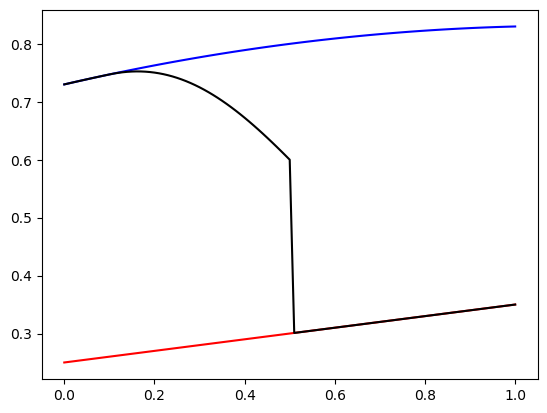

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x74a107b40990>

In [1]:
## Parameters
myA = 0.5
Ybluezero = 0.73
YblueA = 0.8
Yblueone = 0.83
Yredzero = 0.25
YredA = 0.3
Yredone = 0.35
YblackA = 0.6
myxo = 0.1
myxt = 0.2333
myxtt = 0.3666
myxf = 0.6333
myxff = 0.7666
myxs = 0.9


## Functions
Yred(x) = Yredzero * (x - myA) * (x - 1) / ((0 - myA) * (0 - 1)) + 
          YredA * (x - 0) * (x - 1) / ((myA - 0) * (myA - 1)) + 
          Yredone * (x - 0) * (x - myA) / ((1 - 0) * (1 - myA))

Yblue(x) = Ybluezero * (x - myA) * (x - 1) / ((0 - myA) * (0 - 1)) + 
           YblueA * (x - 0) * (x - 1) / ((myA - 0) * (myA - 1)) + 
           Yblueone * (x - 0) * (x - myA) / ((1 - 0) * (1 - myA))

Yblack(x) = if x < 0.1
    Yblue(x)
elseif x > myA
    Yred(x)
else
    cos((x - 0.1) / (myA - 0.1) * π / 2) * Yblue(x) + (1 - cos((x - 0.1) / (myA - 0.1) * π / 2)) * YblackA
end

using PyPlot
xx = 0:0.01:1
plot(xx, map(Yred,xx), c=:red)
plot(xx, map(Yblue,xx), c=:blue)
plot(xx, map(Yblack,xx), c=:black)

0.7658491462104894 and 0.6737901719252517
0.29999999999999893 and 0.344999999999998


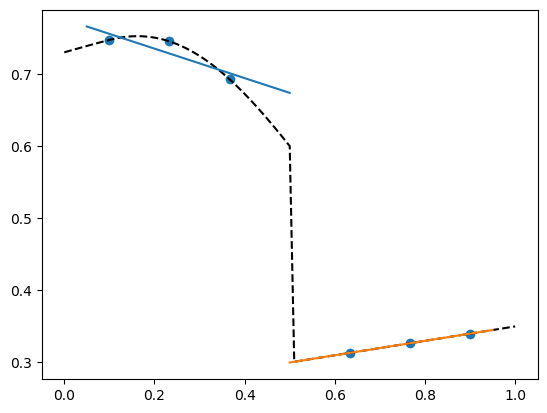

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x74a160190690>

In [2]:
# Compute the coefficients for regression
using LinearAlgebra

xmin = 0.05
xmid = 0.5
xmax = 0.95

# Regression 1
ymin_R1, ymid_R1 = let 
    xpoints = [myxo, myxt, myxtt]
    ypoints = map(Yblack, xpoints)
    Cons = ones(3)
    Xmat = hcat(Cons, xpoints)
    coef = inv(transpose(Xmat) * Xmat) * transpose(Xmat) * ypoints
    ymin_R1 = coef[1] + coef[2] * xmin
    ymid_R1 = coef[1] + coef[2] * xmid
    println("$ymin_R1 and $ymid_R1")
    (ymin_R1, ymid_R1)
end

# Regression 2
ymid_R2, ymax_R2 = let
    xpoints = [myxf, myxff, myxs]
    ypoints = map(Yblack, xpoints)
    Cons = ones(3)
    Xmat = hcat(Cons, xpoints)
    coef = inv(transpose(Xmat) * Xmat) * transpose(Xmat) * ypoints
    ymid_R2 = coef[1] + coef[2] * xmid
    ymax_R2 = coef[1] + coef[2] * xmax
    println("$ymid_R2 and $ymax_R2")
    (ymid_R2, ymax_R2)
end


plot(xx, map(Yblack,xx), c=:black, ls=:dashed)
xxdots = [myxo, myxt, myxtt, myxf, myxff, myxs]
scatter(xxdots, map(Yblack,xxdots))
plot([xmin,xmid],[ymin_R1, ymid_R1])
plot([xmid,xmax],[ymid_R2, ymax_R2])